# ARCVIL CHURN PREDICTION

## 1. BUSINESS UNDERSTANDING

ArcVil is a telecommunication company that is US-based. Its aim is to provide efficient and affordable info-communication services to its customers. In recent years, the has been stiff competitiion in the telecommunication industry. Due to the many competitors offering telecommunication industry, customers have a variety of telecommunication options to chose from. Arcvil therefore wants to maintain its customers base. This is because, the cost of acquiring new customers is higher than the cost of maintaining them. When customers migrate to competitiors, Arcvil's profit is also affected. Management of Arcvil want a predictive model to determine how long do customers stay with them before moving to their competitors

## 2. DATA UNDERSTANDING
The data used in this project was downloaded from [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/discussion/235073) but it was for a prediction competition for [CrowdANALYTIX](https://www.crowdanalytix.com/contests/why-customer-churn). The dataset consists of one csv file. It contains 20 columns and  3333 records. Out of this 3333 record, there are 483 customers who churned and the remaining 2850 are non-churners. 

### Specific Objectives
- What variables are contributing to customer churn?
- Who are the customers more likely to churn?
- What actions can be taken to stop them from leaving?

## 3. DATA PREPARATION

## 4. EXPLORATORY DATA ANALYSIS

In [1]:
# IMPORTING LIBRARIES
#visialisation and mathematical operations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#measure model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

#for encoding and standardising data
from sklearn.preprocessing import LabelEncoder, StandardScaler

#classification algorithims
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#spliting data set and training on multiple data set
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
# LOADING DATA
data = pd.read_csv("data/bigml_59c28831336c6604c800002a.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# CHECKING FOR DATA TYPES
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Checking for missing values and duplicates

In [4]:
# CHECKING FOR MISSING VALUES
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
# CHECKING FOR DUPLICATED VALUES
data.duplicated().sum()

0

From the analysis above, there are no missing or duplicated values

### Removing unwanted columns and computing total charges

In [6]:
#COMPUTING TOTAL CHARGE INCURED BY CUSTOMERS
data['total charge'] = data['total day charge'] + data['total night charge']

In [7]:
#removing unncecessary features on the data
data = data.drop(['phone number'], axis = 1)
data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total charge
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,56.08
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,38.92
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,48.70
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,59.76
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,36.75


### Checking for distribution of data

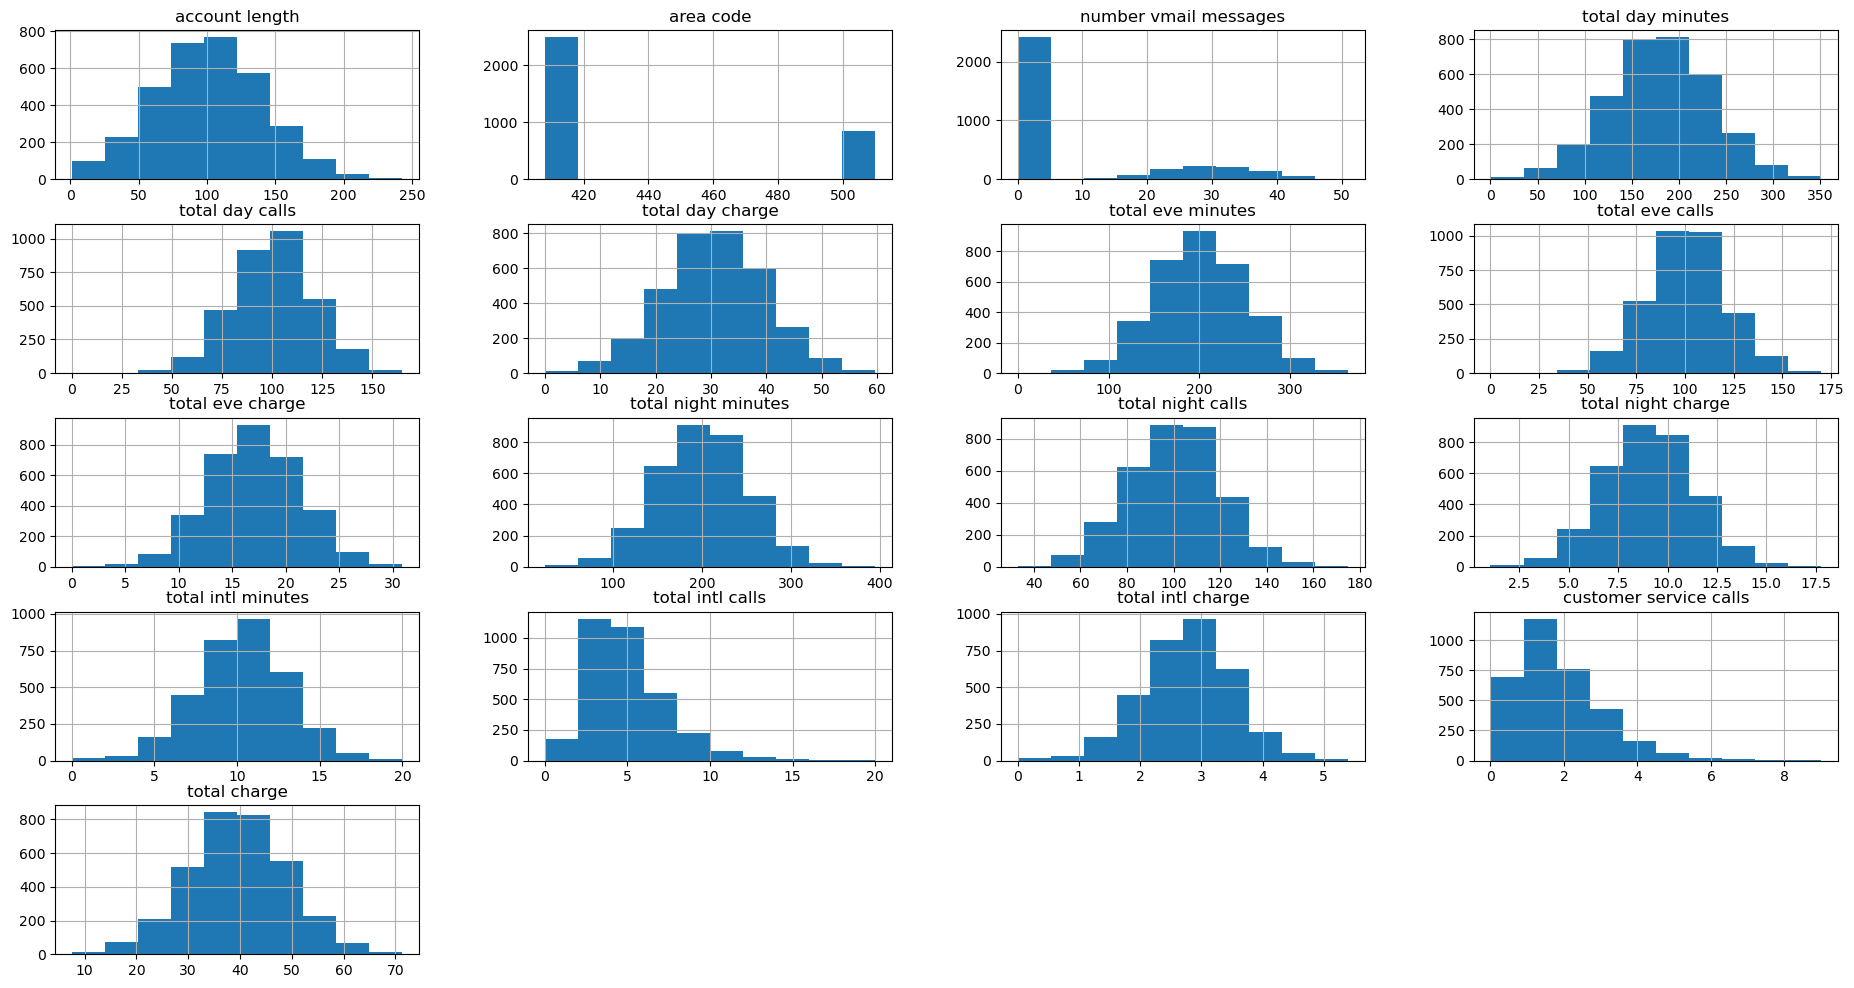

In [8]:
histograms = data.hist(figsize=(23,12))

From the histogram subplots, it can be noted that our data is not normally distributed for area code, number of voice mail messages, total day calls, total international calls, customer service call. 

The data will later undergo transformation in order to normalise it. 
This will assist our models to perform better. 

### ** Univariate Analysis

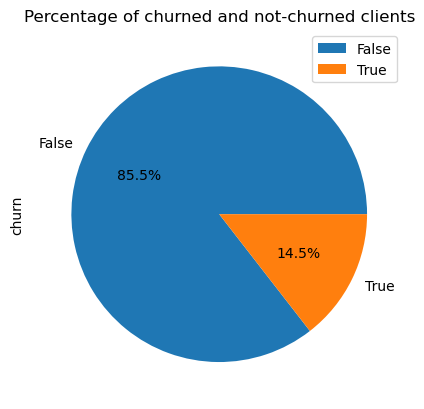

In [10]:
p = data['churn'].value_counts().to_frame()
plot = p.plot.pie(subplots=True, autopct='%1.1f%%')
plt.title("Percentage of churned and not-churned clients");

From the analysis above, it can be seen that 14.5% of their customers churned. From this analysis we note that the data is imbalanced (14% true for churned customers and 85% false for customers who have'nt churned. The data would need to be balanced inorder to improve model performance

### ** Mutlivariate Analysis

### Calculating mean of indepedent variables grouped by churn

In [10]:
data.groupby('churn').mean().T

churn,False,True
account length,100.793684,102.664596
area code,437.074737,437.817805
number vmail messages,8.604561,5.115942
total day minutes,175.175754,206.914079
total day calls,100.283158,101.335404
total day charge,29.780421,35.175921
total eve minutes,199.043298,212.410145
total eve calls,100.038596,100.561077
total eve charge,16.918909,18.054969
total night minutes,200.133193,205.231677


It can be noted that the total charges for those churned is higher than those who havent churned. Also, the number of customer service calls is more in those who churned

### Correlation between indepedent variables and target variable

In [26]:
data[data.columns[1:]].corr()['churn'][:].sort_values(ascending=False)

churn                     1.000000
customer service calls    0.208750
total charge              0.207487
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64

AttributeError: 'AxesImage' object has no property 'width'

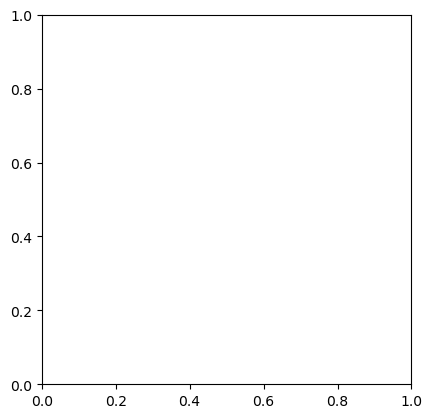

In [18]:
# corr = data.corr()
# corr
# mask = np.triu(np.ones_like(data.corr(),dtype=bool))
# sns.heatmap(data, annot=True, mask=mask)
# plt.title("Correlation between independent and target variables")

From the correlation matrix, it can be seen that there is weak positive correlation of the independent variables to the dependent variable (churn) with an exception of total intl calls and number vmail messages which have a strongly weak correlation. 

## 5. DATA PREPROCESSING

### Encoding categorical columns

In [13]:
#encoding categorical columns
data_enc = data.apply(LabelEncoder().fit_transform)
data_enc

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total charge
0,16,126,1,0,1,19,1491,70,1491,767,...,684,1184,49,657,79,3,79,1,0,2307
1,35,105,1,0,1,20,667,83,667,748,...,668,1265,61,701,116,3,116,1,0,1147
2,31,135,1,0,0,0,1362,74,1362,158,...,150,443,62,292,101,5,101,0,0,1944
3,35,82,0,1,0,0,1625,31,1625,13,...,13,758,47,445,45,7,45,2,0,2385
4,36,73,1,1,0,0,711,73,711,330,...,307,664,79,401,80,3,80,3,0,965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,189,1,0,1,30,618,37,618,934,...,829,1433,41,801,78,6,78,2,0,1162
3329,49,66,1,0,0,0,1269,17,1269,375,...,349,705,81,420,75,4,75,3,0,1889
3330,39,26,2,0,0,0,833,69,833,1489,...,1322,711,49,423,120,6,120,2,0,1190
3331,6,182,2,1,0,0,1123,65,1123,427,...,394,266,95,191,29,10,29,2,0,1471


Since the data has categorical columns, they were encoded using LabelEncorder, which transfromed them into numbers. 

### Data balancing using SMOTE

In [19]:
#splitting data into training and testing data
y = data_enc['churn']
X = data_enc.drop('churn', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3 ,random_state=30)

In [20]:
#using SMOTE to balance the data. 
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = X_train.columns
X_train_bal,y_train_bal = os.fit(X_train,y_train)
X_train_bal = pd.DataFrame(data=X_train_bal,columns=columns )
y_train_bal= pd.DataFrame(data=y_train_bal,columns=['y'])
# we can Check the numbers of our data
print(len(X_train_bal))
print(len(y_train_bal))
# we can Check the numbers of our data

ModuleNotFoundError: No module named 'imblearn'

### Normalising data using StandardScaler

In [21]:
#Instantiate a scaler
scaler = StandardScaler()
#transform the X_train
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Baseline models

### logistic regression

In [23]:
from sklearn.metric import accuracy_score, recall_score, precision_score, f_score
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Performance evaluation
    def print_scores(alg, y_train, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_train, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_train, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_train, y_pred)
        print("recall: ",rec_score)
        f_score = f1_score(y_train, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_train, y_pred)
    return model

# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression')


ModuleNotFoundError: No module named 'sklearn.metric'

## 6. Evaluation

for classificatio metrics, the most common used method for evaluatio is AUPRC(area under the precision and recall curve). AUPRC provides a better way for measuring model performance in those situations where you care most about finding the positive outcomes of a minority class